# Project 1
## B-IT Pattern Recognition



Presented on 10-Dec-2015 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

## Task 1.1
### Remove the outliers

### Load the data first

- We went with the approach **1** of reading multi-typed data as in `whExample.py`
    
    + We like it because it is more explicit

    + Or use `pandas`
    
- We are using **Python 3.4**, so some modifications were made for compatibility

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
dt = np.dtype([('w', np.float), ('h', np.float), ('g', 'S1')])  # g is byte-string

data = np.loadtxt('data/whData.dat', dtype=dt, comments='#', delimiter=None)

ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2].decode('utf-8') for d in data])

X = np.vstack((hs, ws, gs))  # data is going to be column-wise
# X.transpose()  # this will make it row-wise
X.shape

(3, 24)

### Raw Data
- Now, let's just plot it without modifications

    - We split the data based on gender

In [3]:
import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex

male : 17 ; female : 7


<IPython.core.display.Javascript object>


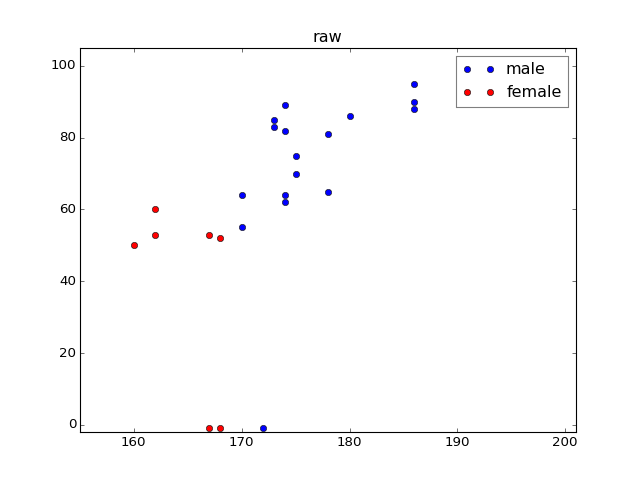

In [4]:
# split
X_male, X_female = pre_rex.split_data(X, True, 2, ['m', 'f'])
print("male :", X_male.shape[1], "; female :", X_female.shape[1])

# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_ = np.vstack((hs, ws))  # only the measurements; data is col-wise
xmin, ymin = X_.min(axis=1)
xmax, ymax = X_.max(axis=1)

xlim = [xmin-5, xmax+15]  # purely for looks
ylim = [-2, ymax+10]

plt_rex.plot2d(X_male, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="male")
plt_rex.plot2d(X_female, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="female", title="raw")

### Outliers!!

Outliers may give important insights

### Dealing with the outliers
- Here, we just ignore them

    - We keep ...
    > only those data for which both measurements are positive.
    

- We find the *unique* columns/rows for which any of the measurements are negative 

    - Then we delete the entire columns/rows that contain such measurements

        + using `numpy.delete(...)`

<IPython.core.display.Javascript object>


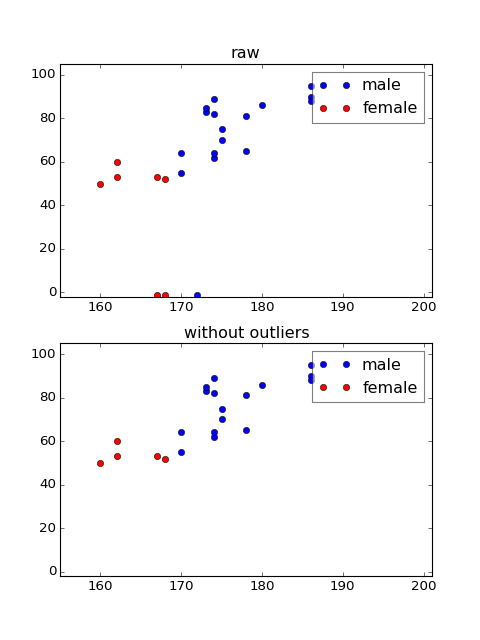

In [5]:
X_male_new = pre_rex.only_all_positive(X_male[0:2, :].astype(np.float), True)
X_female_new = pre_rex.only_all_positive(X_female[0:2, :].astype(np.float), True)

# plotting
fig = plt.figure(figsize=(6, 8))
axs1 = fig.add_subplot(211)
axs2 = fig.add_subplot(212)

# using the old xlim, ylim

plt_rex.plot2d(X_male, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
               show=False, axs=axs1, plotlabel="male")
plt_rex.plot2d(X_female, colwise_data=True, hatch='ro', 
               x_lim=xlim, y_lim=ylim, show=False, axs=axs1, 
               plotlabel="female", title="raw")

plt_rex.plot2d(X_male_new, colwise_data=True, hatch='bo', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs2, plotlabel="male")
plt_rex.plot2d(X_female_new, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs2, plotlabel="female",
               title="without outliers")

## Task 1.2
### Fit normal distribution to data

### Find the mean and standard Deviation of the height/weight data

- We used `numpy.mean(...)` and `numpy.std(...)`

- Then we use `scipy.stats.norm.pdf` to generate the normal distribution 

In [4]:
import pattrex.fitting as fit_rex

### Plot

In [7]:
# fit normal distribution
h_mean, h_std, h_x, h_y = fit_rex.fit_normal_distribution(hs)

w_mean, w_std, w_x, w_y = fit_rex.fit_normal_distribution(ws)

# limits for the axes, and yes we are going to cheat by using X_
hmin, wmin = X_.min(axis=1)
hmax, wmax = X_.max(axis=1)

hlim = [hmin-5, hmax+15]  # purely for looks
wlim = [wmin-5, wmax+15]

<IPython.core.display.Javascript object>


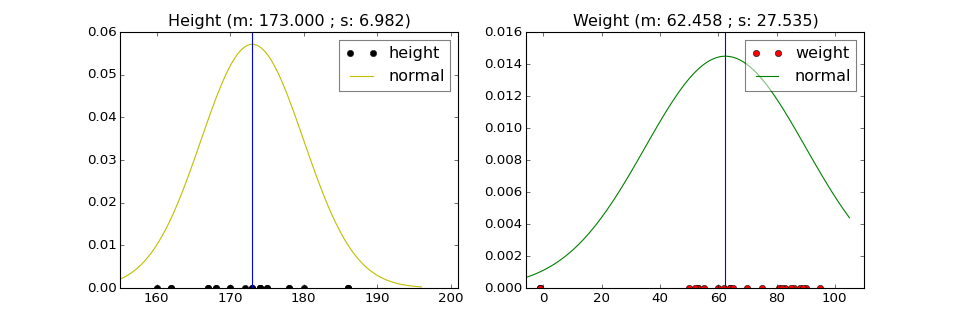

In [19]:
# plotting
fig = plt.figure(figsize=(12, 4))
axs1 = fig.add_subplot(121)
axs2 = fig.add_subplot(122)

# height
plt_rex.plot2d(np.vstack((hs, np.zeros(hs.shape))), colwise_data=True, 
               hatch='ko', x_lim=hlim, show=False, axs=axs1, 
               plotlabel="height")
plt_rex.plot2d(np.vstack((h_x, h_y)), colwise_data=True, hatch='y', 
               x_lim=hlim, show=False, axs=axs1, plotlabel="normal", 
               title=("Height (m: %.3f ; s: %.3f)")%(h_mean, h_std))
axs1.axvline(x = h_mean)

# weight
plt_rex.plot2d(np.vstack((ws, np.zeros(ws.shape))), colwise_data=True, 
               hatch='ro', x_lim=wlim, show=False, axs=axs2, 
               plotlabel="weight")
plt_rex.plot2d(np.vstack((w_x, w_y)), colwise_data=True, hatch='g', 
               x_lim=wlim, show=False, axs=axs2, plotlabel="normal", 
               title=("Weight (m: %.3f ; s: %.3f)")%(w_mean, w_std))
axs2.axvline(x = w_mean)

### Outliers!!

### Plot (without outliers)

In [9]:
X_new = pre_rex.only_all_positive(X_, True)
h_new = X_new[0, :]
w_new = X_new[1, :]

# fit normal distribution
h_mean_new, h_std_new, h_x_new, h_y_new = fit_rex.fit_normal_distribution(h_new)

w_mean_new, w_std_new, w_x_new, w_y_new = fit_rex.fit_normal_distribution(w_new)

<IPython.core.display.Javascript object>


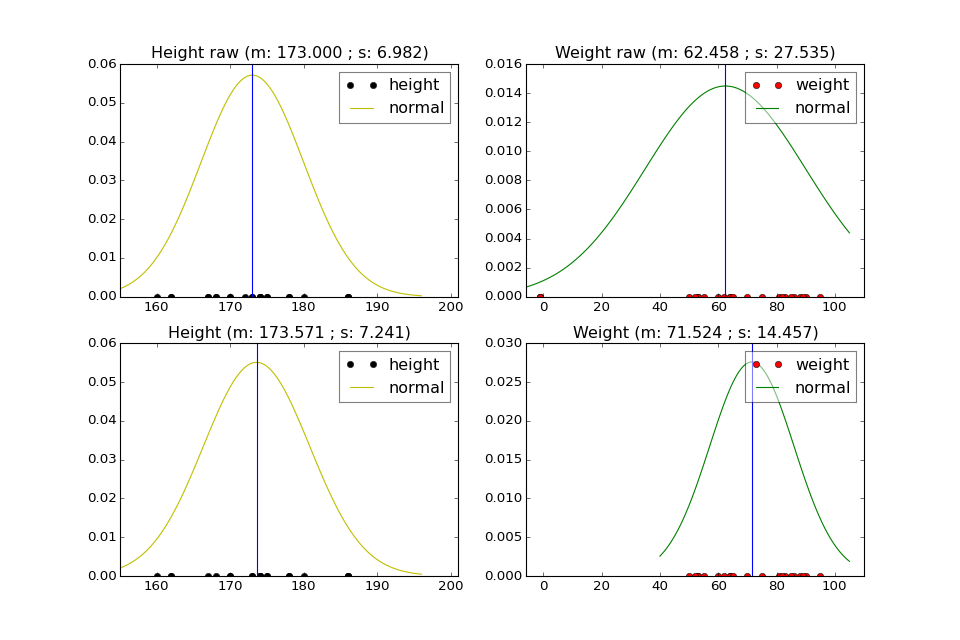

In [21]:
# plotting
fig = plt.figure(figsize=(12, 8))
axs1 = fig.add_subplot(221)
axs2 = fig.add_subplot(222)
axs3 = fig.add_subplot(223)
axs4 = fig.add_subplot(224)

# limits for the axes, and yes we are going to cheat by using X_
hmin_new, wmin_new = X_new.min(axis=1)
hmax_new, wmax_new = X_new.max(axis=1)

hlim_new = [hmin_new-5, hmax_new+15]  # purely for looks
wlim_new = [wmin_new-5, wmax_new+15]

# height raw
plt_rex.plot2d(np.vstack((hs, np.zeros(hs.shape))), colwise_data=True, 
               hatch='ko', x_lim=hlim_new, show=False, axs=axs1, 
               plotlabel="height")
plt_rex.plot2d(np.vstack((h_x, h_y)), colwise_data=True, hatch='y', 
               x_lim=hlim_new, show=False, axs=axs1, plotlabel="normal", 
               title=("Height raw (m: %.3f ; s: %.3f)")%(h_mean, h_std))
axs1.axvline(x = h_mean)

# weight raw
plt_rex.plot2d(np.vstack((ws, np.zeros(ws.shape))), colwise_data=True, 
               hatch='ro', x_lim=wlim, show=False, axs=axs2, 
               plotlabel="weight")
plt_rex.plot2d(np.vstack((w_x, w_y)), colwise_data=True, hatch='g', 
               x_lim=wlim, show=False, axs=axs2, plotlabel="normal", 
               title=("Weight raw (m: %.3f ; s: %.3f)")%(w_mean, w_std))
axs2.axvline(x = w_mean)

# height
plt_rex.plot2d(np.vstack((h_new, np.zeros(h_new.shape))), colwise_data=True, 
               hatch='ko', x_lim=hlim_new, show=False, axs=axs3, 
               plotlabel="height")
plt_rex.plot2d(np.vstack((h_x_new, h_y_new)), colwise_data=True, hatch='y', 
               x_lim=hlim_new, show=False, axs=axs3, plotlabel="normal",
               title=("Height (m: %.3f ; s: %.3f)")%(h_mean_new, h_std_new))
axs3.axvline(x = h_mean_new)

# weight
plt_rex.plot2d(np.vstack((w_new, np.zeros(w_new.shape))), colwise_data=True, 
               hatch='ro', x_lim=wlim, show=False, axs=axs4, 
               plotlabel="weight")
plt_rex.plot2d(np.vstack((w_x_new, w_y_new)), colwise_data=True, hatch='g', 
               x_lim=wlim, show=False, axs=axs4, plotlabel="normal",
               title=("Weight (m: %.3f ; s: %.3f)")%(w_mean_new, w_std_new))
axs4.axvline(x = w_mean_new)

### Outliers


We see how the presence of outliers can mess things up for this simple model

Central Moments are not robust to outliers

## Task 1.3
### Fitting a Weibull Distribution

## Task 1.4
### Drawing $L^p$ Unit Circles in $\mathbb{R}^{2}$

### $L^p$ norm for $\mathbb{R}^{m}$

We use the following definition for $m$-dimensional $x$:
$$\|x\|_p=\left(|x_1|^p+|x_2|^p+\dotsb+|x_m|^p\right)^{\frac{1}{p}}$$

For $\mathbb{R}^{2}$,

- We choose 100 values for $x_{1}$ in range $[0...1]$

    + We exploit the symmetry of unit circles

- Then find corresponding $x_{2}$ as : $$x_{2} = \left(1 - x_{1}^{p} \right)^{\frac{1}{p}}$$

    + since we are going to cheat, we only use one solution for $x_{2}$

In [5]:
import pattrex.unit_circles as uc_rex

<IPython.core.display.Javascript object>


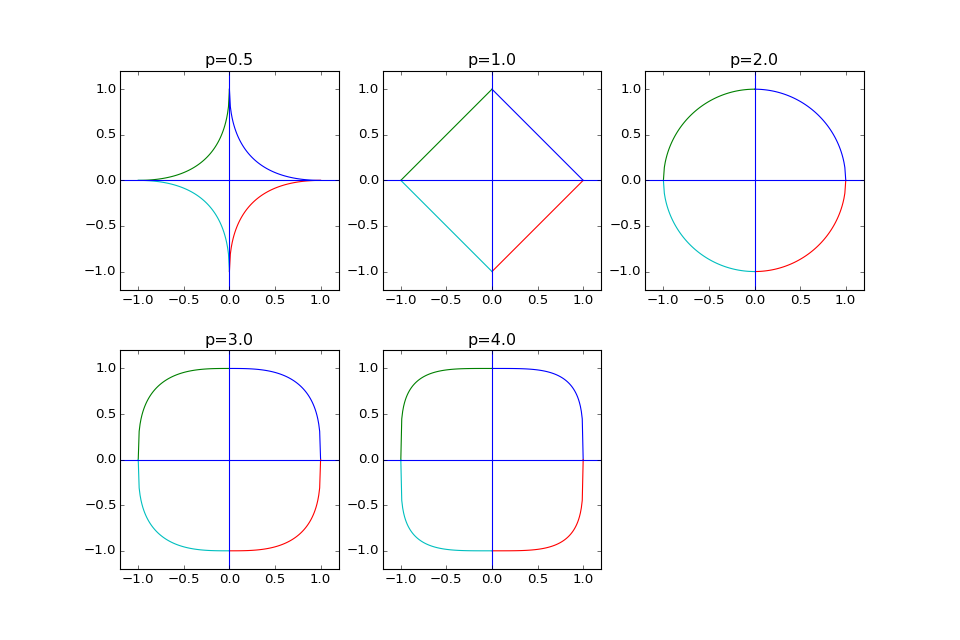

In [6]:
fig = plt.figure(figsize=(12, 8))
subplot_num = 230
for p in [0.5, 1, 2, 3, 4]:
    
    x, y = uc_rex.lp_unit_circle(p=p)
    
    subplot_num += 1
    ax = fig.add_subplot(subplot_num)
    plt_rex.plot2d(np.vstack((x, y)), colwise_data=True, axs=ax, hatch='-')
    plt_rex.plot2d(np.vstack((-x, y)), colwise_data=True, axs=ax, hatch='-')
    plt_rex.plot2d(np.vstack((x, -y)), colwise_data=True, axs=ax, hatch='-')
    plt_rex.plot2d(np.vstack((-x, -y)), colwise_data=True, axs=ax, 
                  x_lim=[-1.2, 1.2], y_lim=[-1.2, 1.2],
                  set_aspect_equal=True, show=False, 
                  show_axes_through_origin=True, 
                  title="p=%.1f" % (p), hatch='-')

### But, there is one more way to do this

We can take the *Sieve Approach*

1. Calculate the p-norm for **all**\* points in the [-1...1] square
    
    - we used `numpy.linalg.norm(...)`
    
    - and some indexing tricks
    
2. Filter out where the value is 1

//anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


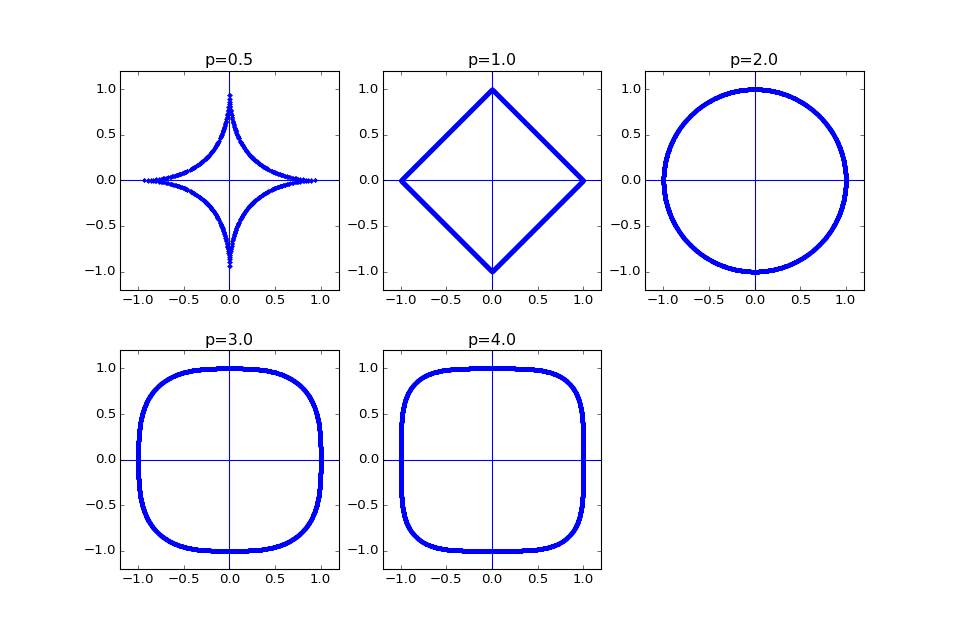

p : 0.5 ; points 688 ( 0.0688 % )
p : 1 ; points 3996 ( 0.3996 % )
p : 2 ; points 3196 ( 0.3196 % )
p : 3 ; points 3548 ( 0.3548 % )
p : 4 ; points 3728 ( 0.3728 % )


In [27]:
x = np.linspace(-1, 1, 1000)  # not so smart
y = np.linspace(-1, 1, 1000)

# for convenience
m = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
subplot_num = 230
for p in [0.5, 1, 2, 3, 4]:
    
    # calculate p-norms for **all** points
    norms = np.linalg.norm(m, axis=0, ord=p)
    
    # find where p-norm is 1, with some tolerance
    xi, yi = np.where(np.isclose(norms, 1, atol=0.001))
    
    print("p :", p, "; points", xi.size, "(", 100*xi.size/1000000, "% )")
    
    subplot_num += 1
    ax = fig.add_subplot(subplot_num)
    plt_rex.plot2d(np.vstack((x[xi], y[yi])), colwise_data=True, axs=ax, 
                  x_lim=[-1.2, 1.2], y_lim=[-1.2, 1.2],
                  set_aspect_equal=True, show=False, 
                  show_axes_through_origin=True, 
                  title="p=%.1f" % (p), hatch='.')

#### This method is ***extremely*** wasteful
And, ***some plots will just not appear*** (when an appropriate number of points to sieve through is not chosen)

#### But
- All we needed was a function that calculates the desired norms
- No pen-paper required to find the *solutions* first
- Very quick and easy to reason about (if you don't crash your machine)

### Using that
***

## Bonus Task
### Drawing Aitchison Unit Circles in $\mathbb{S}^{3}$

### Aitchison Norm

Norm of $\mathbf{x} \in \mathbb{S}^{D}$ is defined as: 
$$\|\mathbf{x}\|_{a} = \sqrt{ \frac{1}{2D} \sum_{i=1}^D \sum_{j=1}^D {\left( ln \frac{x_i}{x_j} \right)}^{2} }$$

In practice, there is an alternative that can be used,
$$\|\mathbf{x}\|_{a} = \sqrt{ \sum_{i=1}^D \left({ln (x_i) - ln (g_m (\mathbf{x}))} \right)^{2} }$$
where $g_m(\cdot)$ is the geometric mean of the arguments

$ln( g_m(\cdot))$ can be replaced by mean of logs

In [1]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


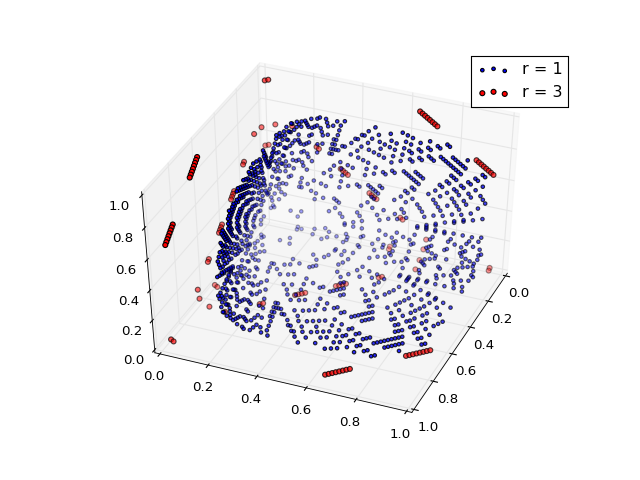

In [12]:
###  WARNING  ###  WARNING  ###  WARNING  ###
# the slightest of changes to n can CRASH YOUR SYSTEM
n = 100

x = np.linspace(1e-9, 1, n)  # zero is not used due to log
xx, yy, zz = np.meshgrid(x, x, x)

# calculate all Aitchison Norms
norms = uc_rex.aitchison_norm((xx, yy, zz))

# find where norms is 1, 3
xyzi_1 = np.where(np.isclose(norms, 1, atol=0.001))
xyzi_3 = np.where(np.isclose(norms, 3, atol=0.001))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[xyzi_1], yy[xyzi_1], zz[xyzi_1], c='b', s=10)
ax.scatter3D(xx[xyzi_3], yy[xyzi_3], zz[xyzi_3], c='r')
ax.set_zlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.legend(["r = 1", "r = 3"])

We can be a bit smarter and do something like this

/Users/myrmidon/Delve/studies-mi/patt-rex/pattrex/unit_circles.py:18: RuntimeWarning: invalid value encountered in log
  lxyz = np.log(xyz)
//anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


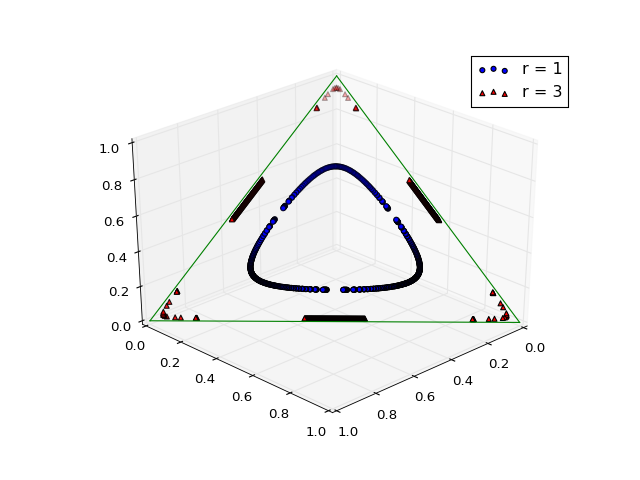

In [54]:
x = np.linspace(1e-9, 1-(1e-9), 1200) 
y = (1 - 1e-8) - x
xx, yy = np.meshgrid(x, y)
zz = (1 - 1e-7) - xx - yy
# weird numbers above for numerical stability  # doesn't work

# calculate all Aitchison Norms
norms = uc_rex.aitchison_norm((xx, yy, zz))

# find where norms is 1, 3
xyzi_1 = np.where(np.isclose(norms, 1, atol=0.001))
xyzi_3 = np.where(np.isclose(norms, 3, atol=0.001))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[xyzi_1], yy[xyzi_1], zz[xyzi_1], c='b', marker='o')
ax.scatter3D(xx[xyzi_3], yy[xyzi_3], zz[xyzi_3], c='r', marker='^')
ax.set_zlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.legend(["r = 1", "r = 3"])
ax.plot(np.linspace(0, 1, 100), np.linspace(1, 0, 100), np.zeros(100), 'g')
ax.plot(np.zeros(100), np.linspace(0, 1, 100), np.linspace(1, 0, 100), 'g')
ax.plot(np.linspace(1, 0, 100), np.zeros(100), np.linspace(0, 1, 100), 'g')

#### The *Sieve Approach* at least lifted the mystery
- it was very easy, and quick to code
    + Safety? (no comments)
- **but**, we're pretty sure this is not the best way to do it